# Contour Detection

## import Libraries

In [1]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt


## Import Images

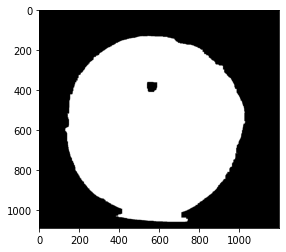

In [76]:
bgr = cv2.imread("Red_Apple.jpg")
rgb = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(bgr, cv2.COLOR_BGR2GRAY)
gray_cp = np.copy(gray)
hls = cv2.cvtColor(bgr, cv2.COLOR_BGR2HLS)
hls_mask = cv2.inRange(hls, np.array([0, 0 , 130]), np.array([360, 255, 255]))
gray_cp[hls_mask == 0] = 255
retval, binary = cv2.threshold(gray_cp, 220, 255, cv2.THRESH_BINARY_INV)

binary = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, np.ones((25,25), np.uint8))
plt.imshow(binary, cmap= "gray")


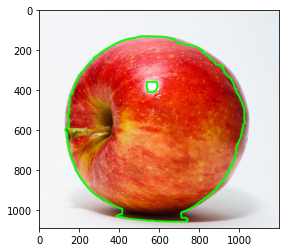

In [77]:
# find contoures from thresholded binary image
contours, hierarchy  = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
rgb_cp = np.copy(rgb)

contoured = cv2.drawContours(rgb_cp, contours, -1, (0,255,0), 8)

plt.imshow(contoured)

## Angle function

In [11]:
def orientaions(contours):
    """
    Orientaion
    :param: contours: a list of contours
    :return: angels: the orintation of contours
    """
    angles = []
    for contour in contours:
        (x,y), (Ma,ma), angle = cv2.fitEllipse(contour)
        angles.append(angle)
    return angles

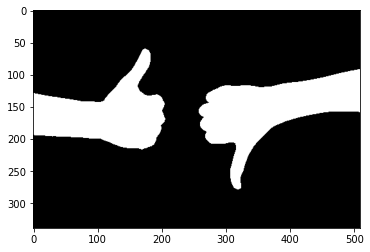

In [7]:
bgr = cv2.imread("thumbs_up_down.jpg")
rgb = cv2.cvtColor( bgr, cv2.COLOR_BGR2RGB)

gray = cv2.cvtColor(bgr, cv2.COLOR_BGR2GRAY)

# get contours 
retval , binary = cv2.threshold(gray, 220, 255 , cv2.THRESH_BINARY_INV)
plt.imshow(binary, cmap= "gray")

contours, hierarchy  = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)


angel of hands are:[60.63807678222656, 83.56391143798828]
355.9075012207031 166.7782745361328
118.73226165771484 145.49942016601562


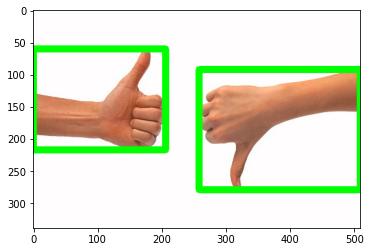

In [19]:
print("angel of hands are:{}".format(orientaions(contours= contours)))
rgb_cp = np.copy(rgb)

for contour in contours:
        (x,y), (Ma,ma), angle = cv2.fitEllipse(contour)
        print(x,y)
        x,y,w,h = cv2.boundingRect(contour)
        cv2.rectangle(rgb_cp, (x,y), (x+w, y+h), (0,255,0),10)

plt.imshow(rgb_cp)